<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ex-2 Polydoros Akritidis
Decision Trees


#Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

#Importing the dataset

In [ ]:
df = pd.read_csv("breast_cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#Dataset Summary

In [ ]:
df.describe ()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
column_names = df.columns
print(column_names)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


#Dropping the unessecary columns

I think that id and Unnamed 32 should be dropped because they are not contributing to the model

In [ ]:
target_column = "diagnosis"
y = df[target_column].to_numpy()
y_names = df[target_column].unique().tolist()

columns_to_drop = ['id', 'diagnosis', 'Unnamed: 32']
x = df.drop(columns=columns_to_drop).to_numpy()

fn= df.drop(columns=columns_to_drop)
feature_names=fn.columns

#Splitting the dataset into train and test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Using the Decision Tree Classifier

Initializing some variables needed for the tree

In [ ]:
criteria = ["gini", "entropy", "log_loss"]
max_depths = [None, 3, 5]
min_samples_leafs = [1, 5, 10]
results_tree = []
i=0

max_accuracy = 0.0

best_hyperparameters_list = []

Starting the 3 nested loop for each hyperameter needed

In [ ]:
for criterion in criteria:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:

            #Iniialize the classifier
            tree_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

            #Train the model
            tree_classifier.fit(x_train, y_train)

            #Predict the test set and see the accuracy
            y_pred = tree_classifier.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)

            #Append the results to a list
            results_tree.append({
                "Criterion": criterion,
                "Max Depth": max_depth,
                "Min Samples Leaf": min_samples_leaf,
                "Accuracy": accuracy
            })
            if accuracy == max_accuracy:
                # If accuracy is the same as the current maximum, add these hyperparameters to the list
                best_hyperparameters_list.append({"Criterion": criterion, "Max Depth": max_depth, "Min Samples Leaf": min_samples_leaf})
            elif accuracy > max_accuracy:
                # If accuracy is greater than the current maximum, update the maximum and reset the list
                max_accuracy = accuracy
                best_hyperparameters_list = [{"Criterion": criterion, "Max Depth": max_depth, "Min Samples Leaf": min_samples_leaf}]


            # Print the necessary information/results
            conf_matrix = confusion_matrix(y_test, y_pred)
            i=i+1
            print(f"Iteration No {i}")
            print(f"Criterion: {criterion}, Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}")
            print(f"Accuracy: {accuracy}")
            print("Confusion Matrix:")
            print(conf_matrix)





Iteration No 1
Criterion: gini, Max Depth: None, Min Samples Leaf: 1
Accuracy: 0.9035087719298246
Confusion Matrix:
[[59  8]
 [ 3 44]]
Iteration No 2
Criterion: gini, Max Depth: None, Min Samples Leaf: 5
Accuracy: 0.9473684210526315
Confusion Matrix:
[[62  5]
 [ 1 46]]
Iteration No 3
Criterion: gini, Max Depth: None, Min Samples Leaf: 10
Accuracy: 0.9649122807017544
Confusion Matrix:
[[66  1]
 [ 3 44]]
Iteration No 4
Criterion: gini, Max Depth: 3, Min Samples Leaf: 1
Accuracy: 0.9649122807017544
Confusion Matrix:
[[66  1]
 [ 3 44]]
Iteration No 5
Criterion: gini, Max Depth: 3, Min Samples Leaf: 5
Accuracy: 0.9736842105263158
Confusion Matrix:
[[66  1]
 [ 2 45]]
Iteration No 6
Criterion: gini, Max Depth: 3, Min Samples Leaf: 10
Accuracy: 0.9649122807017544
Confusion Matrix:
[[66  1]
 [ 3 44]]
Iteration No 7
Criterion: gini, Max Depth: 5, Min Samples Leaf: 1
Accuracy: 0.9473684210526315
Confusion Matrix:
[[64  3]
 [ 3 44]]
Iteration No 8
Criterion: gini, Max Depth: 5, Min Samples Leaf: 5

Print the best hyparameters

In [ ]:
print("Best Hyperparameters:")
for hyperparameters in best_hyperparameters_list:
    print(hyperparameters)
print("Max Accuracy:", max_accuracy)

Best Hyperparameters:
{'Criterion': 'gini', 'Max Depth': 3, 'Min Samples Leaf': 5}
Max Accuracy: 0.9736842105263158


Plot the tree of the best hyperparameters

Class Label for y=0: B
Class Label for y=1: M


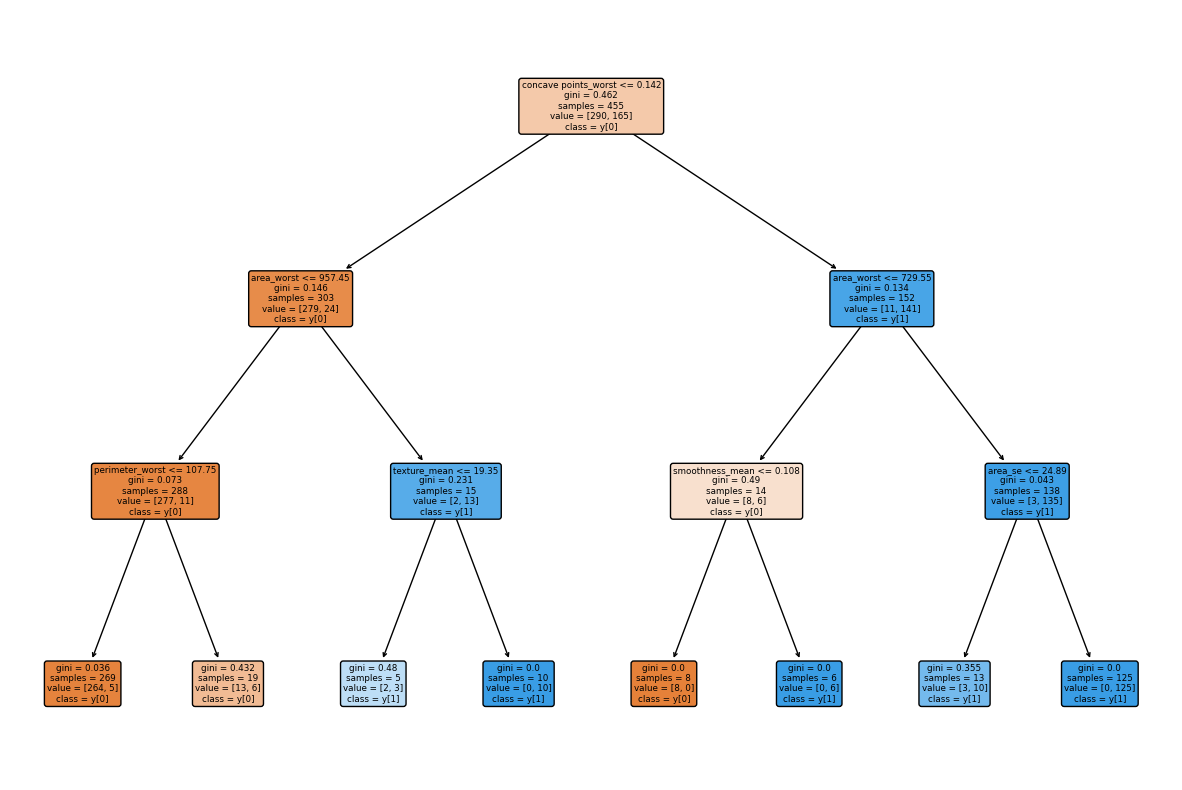

In [ ]:
for best_hyperparameters in best_hyperparameters_list:
    best_tree_classifier = DecisionTreeClassifier(criterion=best_hyperparameters["Criterion"], max_depth=best_hyperparameters["Max Depth"], min_samples_leaf=best_hyperparameters["Min Samples Leaf"])
    best_tree_classifier.fit(x_train, y_train)

    class_labels = best_tree_classifier.classes_

    print(f"Class Label for y=0: {class_labels[0]}")
    print(f"Class Label for y=1: {class_labels[1]}")

    plt.figure(figsize=(15, 10))
    plot_tree(best_tree_classifier, feature_names=feature_names, filled=True, rounded=True, class_names=True)


#Using the random forest Classifier

Initializing some variables needed for the Random forest

In [ ]:
n_estimators = [50, 100, 200]
criteria = ["gini", "entropy", "log_loss"]
min_samples_split = [2, 5, 10]

results_forest = []

max_accuracy = 0.0
best_hyperparameters_list = []
i = 0

Starting the 3 nested loop for each hyperameter needed

In [ ]:
for n_estimator in n_estimators:
    for criterion in criteria:
        for min_sample_split in min_samples_split:


           #initialize the forest
            random_forest_classifier = RandomForestClassifier(
                n_estimators=n_estimator,
                criterion=criterion,
                min_samples_split=min_sample_split,
                random_state=0
            )

            #Train the forest
            random_forest_classifier.fit(x_train, y_train)

            #Make predictions and check accuracy of the model
            y_pred = random_forest_classifier.predict(x_test)
            accuracy = accuracy_score(y_pred, y_test)

            if accuracy == max_accuracy:
                best_hyperparameters_list.append({"Criterion": criterion, "N Estimators": n_estimator, "Min Samples Split": min_sample_split})
            elif accuracy > max_accuracy:
                max_accuracy = accuracy
                best_hyperparameters_list = [{"Criterion": criterion, "N Estimators": n_estimator, "Min Samples Split": min_sample_split}]

            #append the results to a list
            results_forest.append({
                'N_estimators': n_estimator,
                'Criterion': criterion,
                'Min_Samples_Split': min_sample_split,
                'Accuracy': accuracy
            })

            #Print info/results
            i += 1
            print(f"Iteration No {i}")
            print(f"N_estimators: {n_estimator}, Criterion: {criterion}, Min Samples Split: {min_sample_split}")
            print(f"Accuracy: {accuracy}")
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))



Iteration No 1
N_estimators: 50, Criterion: gini, Min Samples Split: 2
Accuracy: 0.9736842105263158
Confusion Matrix:
[[67  0]
 [ 3 44]]
Iteration No 2
N_estimators: 50, Criterion: gini, Min Samples Split: 5
Accuracy: 0.9736842105263158
Confusion Matrix:
[[66  1]
 [ 2 45]]
Iteration No 3
N_estimators: 50, Criterion: gini, Min Samples Split: 10
Accuracy: 0.956140350877193
Confusion Matrix:
[[64  3]
 [ 2 45]]
Iteration No 4
N_estimators: 50, Criterion: entropy, Min Samples Split: 2
Accuracy: 0.9736842105263158
Confusion Matrix:
[[66  1]
 [ 2 45]]
Iteration No 5
N_estimators: 50, Criterion: entropy, Min Samples Split: 5
Accuracy: 0.9736842105263158
Confusion Matrix:
[[66  1]
 [ 2 45]]
Iteration No 6
N_estimators: 50, Criterion: entropy, Min Samples Split: 10
Accuracy: 0.9736842105263158
Confusion Matrix:
[[66  1]
 [ 2 45]]
Iteration No 7
N_estimators: 50, Criterion: log_loss, Min Samples Split: 2
Accuracy: 0.9736842105263158
Confusion Matrix:
[[66  1]
 [ 2 45]]
Iteration No 8
N_estimators

Make the results into a table and print

In [ ]:
accuracy_df = pd.DataFrame(results_forest)
accuracy_df

,N_estimators,Criterion,Min_Samples_Split,Accuracy
0,50,gini,2,0.973684
1,50,gini,5,0.973684
2,50,gini,10,0.956140
3,50,entropy,2,0.973684
4,50,entropy,5,0.973684
5,50,entropy,10,0.973684
6,50,log_loss,2,0.973684
7,50,log_loss,5,0.973684
8,50,log_loss,10,0.973684
9,100,gini,2,0.964912


Plot the target count of Malignant and Benign

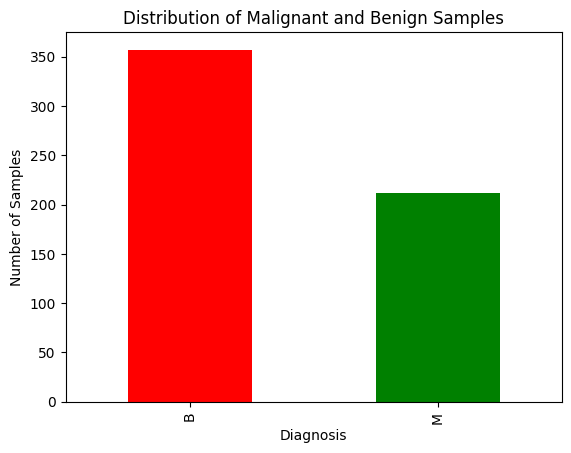

In [ ]:
label_counts = df['diagnosis'].value_counts()


label_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Diagnosis')
plt.ylabel('Number of Samples')
plt.title('Distribution of Malignant and Benign Samples')
plt.show()

Let's have a closer look about the hyperparameters used in the classifiers

At the Decision Tree Classifier

*   Criterion: This parameter determines the function used to measure the quality of a split. The functions we chose between Gini, Entropy and Log loss
*   Max Depth: This parameter limits the maximum depth of the tree, in order to avoid overfitting and have complex relationships
*   Min Samples Leaf: This parameter sets the minimum number of samples required to be in a leaf node. It helps control the size of the leaves and can be useful for preventing the model from fitting the training data too closely.



At the Random forest Classifier

*  Criterion: This parameter determines the function used to measure the quality of a split. The functions we chose between Gini, Entropy and Log loss
*   N_Estimators: This parameter determines the number of the decision trees of the forest.
*   Min_samples_split: This parameter determines the minimum number of samples required to split an internal node in a decision tree within the forest.













We are observing that the amount of Benign instances are way higher than the malignant ones by approximately 175%.

Assuming that if a classifier is trained just with Malignant, it won't be able to find Benign targets. Meaning that the accuracy will be

accuracy = Malignant Count/Count = 200/550 = 36%.

In my opinion this dataset is not good for training a classifier and especially due to a cancer predicting one because the dataset is too small, meaning that the test set will be a few samples and secondly, in order not to make the classifier biased we need to have approximately the same number of Malignant and Benign cases.

#Scatter the plot of the best Decision Trees and Random Forest

Find the best 4 accuracies of both Random Forest and Decision Trees

In [ ]:
sorted_results_tree = sorted(results_tree, key=lambda x: x["Accuracy"], reverse=True)

# Pick the top 4 results
top_4_results_tree = sorted_results_tree[:4]

sorted_results_forest = sorted(results_forest, key=lambda x: x["Accuracy"], reverse=True)

# Pick the top 4 results
top_4_results_forest = sorted_results_forest[:4]



Combine the results into a list and keep the accuracies for the plot

In [ ]:
combined_list = top_4_results_tree + top_4_results_forest
accuracy_column = [item['Accuracy'] for item in combined_list if 'Accuracy' in item]




Scatter the plot

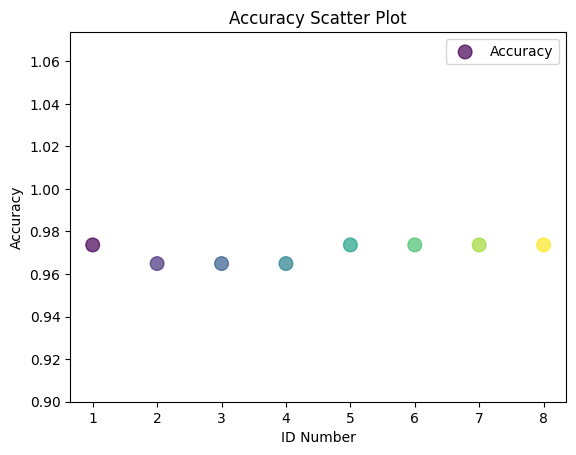

ID explanation


1-4 Decision Tree top 4 accuracies
5-8 Random Forest top 4 accuracies


  Criterion  Max Depth  Min Samples Leaf  Accuracy
1      gini        3.0                 5  0.973684
2      gini        NaN                10  0.964912
3      gini        3.0                 1  0.964912
4      gini        3.0                10  0.964912


   N_estimators Criterion  Min_Samples_Split  Accuracy
5            50      gini                  2  0.973684
6            50      gini                  5  0.973684
7            50   entropy                  2  0.973684
8            50   entropy                  5  0.973684


In [ ]:
x_positions = range(1, 9)

# Assigning different colors to each data point
colors = np.arange(len(accuracy_column))

# Plotting the scatter plot
plt.scatter(x_positions, accuracy_column, s=[acc * 100 for acc in accuracy_column], c=colors, cmap='viridis', alpha=0.7, label='Accuracy')

plt.ylim(0.900, max(accuracy_column) + 0.1)

# Customize the plot
plt.title('Accuracy Scatter Plot')
plt.xlabel('ID Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print ("ID explanation")
print ("\n")
print ("1-4 Decision Tree top 4 accuracies")
print ("5-8 Random Forest top 4 accuracies")
print ("\n")
list1_df = pd.DataFrame(top_4_results_tree)
list1_df.index = list1_df.index + 1
print (list1_df)
list2_df = pd.DataFrame(top_4_results_forest)
list2_df.index = list2_df.index + 5
list2_df
print ("\n")
print(list2_df)


#Plot with the importances

We plot here the importances using MDI, and we see which features are most important

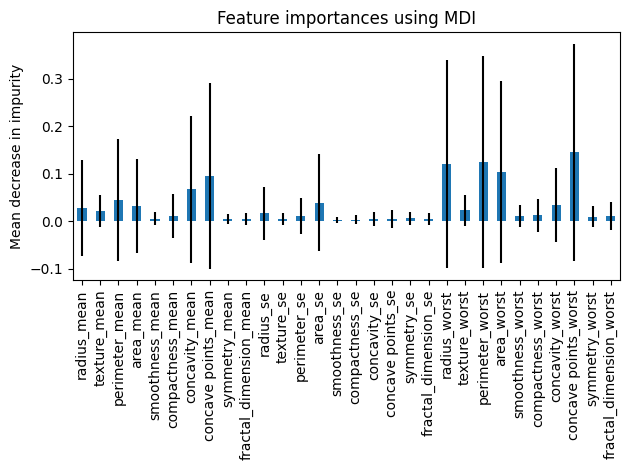

In [ ]:
importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

fn= df.drop(columns=columns_to_drop)
feature_names=fn.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Here we plot the importaces using permutation

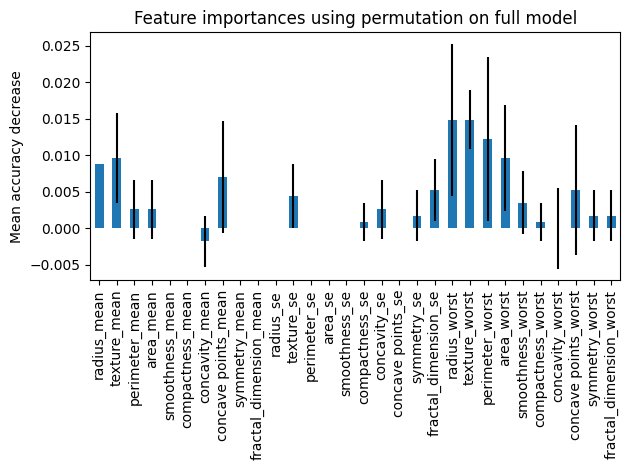

In [ ]:
perm_importance = permutation_importance(
    random_forest_classifier, x_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)

forest_importances = pd.Series(perm_importance.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=perm_importance.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#Pick Random Benign & Malignant from dataset and explain why they belong to the classes

Let's print again the tree

Class Label for y=0: B
Class Label for y=1: M


[Text(0.5, 0.875, 'concave points_worst <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [290, 165]\nclass = B'),
 Text(0.25, 0.625, 'area_worst <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [279, 24]\nclass = B'),
 Text(0.125, 0.375, 'perimeter_worst <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [277, 11]\nclass = B'),
 Text(0.0625, 0.125, 'gini = 0.036\nsamples = 269\nvalue = [264, 5]\nclass = B'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]\nclass = B'),
 Text(0.375, 0.375, 'symmetry_mean <= 0.156\ngini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = M'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = M'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = M'),
 Text(0.75, 0.625, 'area_worst <= 729.55\ngini = 0.134\nsamples = 152\nvalue = [11, 141]\nclass = M'),
 Text(0.625, 0.375, 'smoothness_mean <= 0.108\ngini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = B'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 8\nval

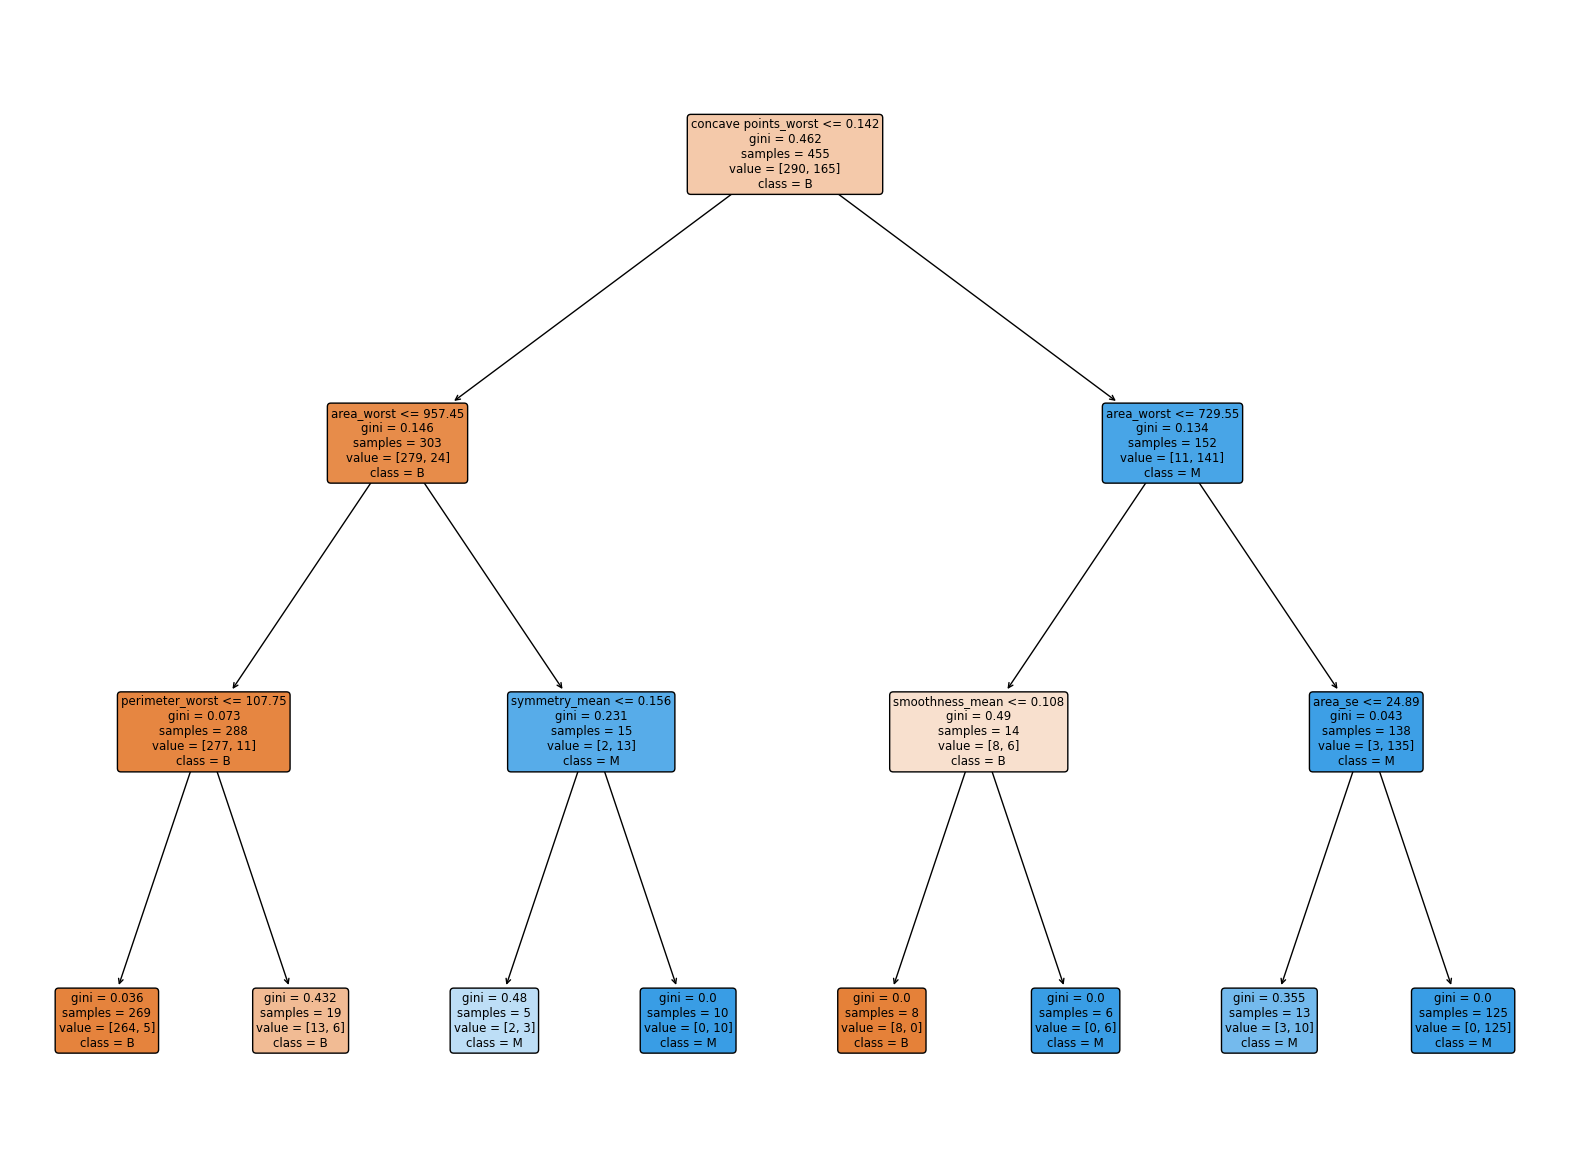

In [ ]:
best_tree_classifier = DecisionTreeClassifier(criterion=best_hyperparameters["Criterion"], max_depth=best_hyperparameters["Max Depth"], min_samples_leaf=best_hyperparameters["Min Samples Leaf"])
best_tree_classifier.fit(x_train, y_train)

class_labels = best_tree_classifier.classes_

print(f"Class Label for y=0: {class_labels[0]}")
print(f"Class Label for y=1: {class_labels[1]}")

plt.figure(figsize=(20, 15))
plot_tree(best_tree_classifier, feature_names=feature_names, filled=True, rounded=True, class_names=class_labels)

Pick a random Malignant sample

In [ ]:
Malignant = df[df['diagnosis'] == "M"].sample(n=1)
pd.set_option('display.max_columns', None)
print (Malignant)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
536  91979701         M        14.27         22.55           93.77      629.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
536           0.1038            0.1154          0.1463              0.06139   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
536         0.1926                 0.05982     0.2027       1.851   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
536         1.895    18.54       0.006113         0.02583       0.04645   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
536            0.01276      0.01451              0.003756         15.29   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
536          34.27            104.3       728.3             0.138   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
536             0

If we follow the tree from top to the bottom and take each value we will see that indeed it is in the correct class.

The first node is concave points worst which is 0.1595 which is higher than the value on node 1. So we go to the right node.

Then we have to see if the area worst is higher or lower than 729.55 which in this case it is 2499 which is higher so we go to the right node

After that we have to see if the area se is higher or lower than 24.9 which in this case it is 525.6 which is higher so we go to the right node

So we get the result Malignant which is true

Pick a random Benign sample

In [ ]:
Benign = df[df['diagnosis'] == "B"].sample(n=1)
pd.set_option('display.max_columns', None)
print (Benign)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
376  901315         B        10.57         20.22           70.15      338.3   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
376          0.09073             0.166           0.228              0.05941   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
376         0.2188                  0.0845     0.1115       1.231   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
376         2.363    7.228       0.008499         0.07643        0.1535   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
376            0.02919      0.01617                0.0122         10.85   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
376          22.82            76.51       351.9            0.1143   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
376             0.361

Accordingly if we follow the tree we can see that indeed belongs to the benign class

concave points worst 0.08388 < 0.142 -> left

area worst               580 < 957.45-> left

perimeter worst           89,69 <107.75 -> left

We can see that the class we reached is Benign